## Credit Card Data analysis

Segmentation in marketing is a technique used to divide customers or other entities into groups based on attributes such as behaviour or demographics.

The top challenge faced by marketers is understanding who they are selling to. Once you know your buyer personas, you can tailor your targeting and offerings to increase their satisfaction and your revenue as a result. When you already have a pool of customers and plenty of data, it can be incredibly useful to segment them.

Here we will be using Credit card data to segment the customers.

## About the dataset
The credit card data has 18 attributes for each customer, which include the balance (credit owed by the customer), cash advance (when a customer withdraws cash using the credit card), the customer’s credit limit, minimum payment, percentage of full payments and tenure. A complete data dictionary info is given below:




|Feature|Description|
|-----|-----|
|CUST_ID| Identification of Credit Card holder (Categorical)| 
|BALANCE | Balance amount left in their account to make purchases| 
|BALANCE_FREQUENCY | How frequently the Balance is updated, score between 0 and 1(1 = frequently updated, 0 = not frequently updated |
|PURCHASES | Amount of purchases made from account| 
|ONEOFF_PURCHASES | Maximum purchase amount done in one-go| 
|INSTALLMENTS_PURCHASES | Amount of purchase done in installment| 
|CASH_ADVANCE | Cash in advance given by the user |
|PURCHASES_FREQUENCY | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
|ONEOFFPURCHASESFREQUENCY | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
|PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
|CASHADVANCEFREQUENCY | How frequently the cash in advance being paid |
|CASHADVANCETRX | Number of Transactions made with "Cash in Advanced" |
|PURCHASES_TRX | Numbe of purchase transactions made |
|CREDIT_LIMIT | Limit of Credit Card for user| 
|PAYMENTS | Amount of Payment done by user |
|MINIMUM_PAYMENTS | Minimum amount of payments made by user| 
|PRCFULLPAYMENT | Percent of full payment paid by user |
|TENURE | Tenure of credit card service for user|

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
df = pd.read_csv("customer_seg.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Lets check the descriptive Statistics of the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [6]:
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

['CUST_ID']

### Dealing with missing values
Lets check the number of missing values in the given dataset

In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Impute these missing values with median and remove `CUST_ID` which is not useful.

In [8]:
# df.set_index('CUST_ID')  this should unique
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].median()
df.loc[(df['CREDIT_LIMIT'].isnull() == True),'CREDIT_LIMIT']  = df['CREDIT_LIMIT'].median()
#  Dropping the cust_id
df.drop("CUST_ID",axis = 1,inplace = True)
# Check again
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Perform log transformation on the data

In [9]:
features=df.copy()

cols = [
    "BALANCE",
    "PURCHASES",
    "ONEOFF_PURCHASES",
    "INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE",
    "CASH_ADVANCE_TRX",
    "PURCHASES_TRX",
    "CREDIT_LIMIT",
    "PAYMENTS",
    "MINIMUM_PAYMENTS"
]

features[cols]=np.log(1+features[cols])
features.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,12
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12


###  Detect outliers in the continuous columns 

As this is a clustering problem, I decided to test without outlier's replacement because to get the meaningful clusters and should make sense after plotting the pair graph.  

We will be Using IRQ Score to identify outliers values in dataset. IRQ method is used in boxplot to identify possible outliers values.

```python
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
```
For now, we`ll do nothing with outliers because this may harm the clustering.

### Visualize the outliers using box plot

<AxesSubplot:>

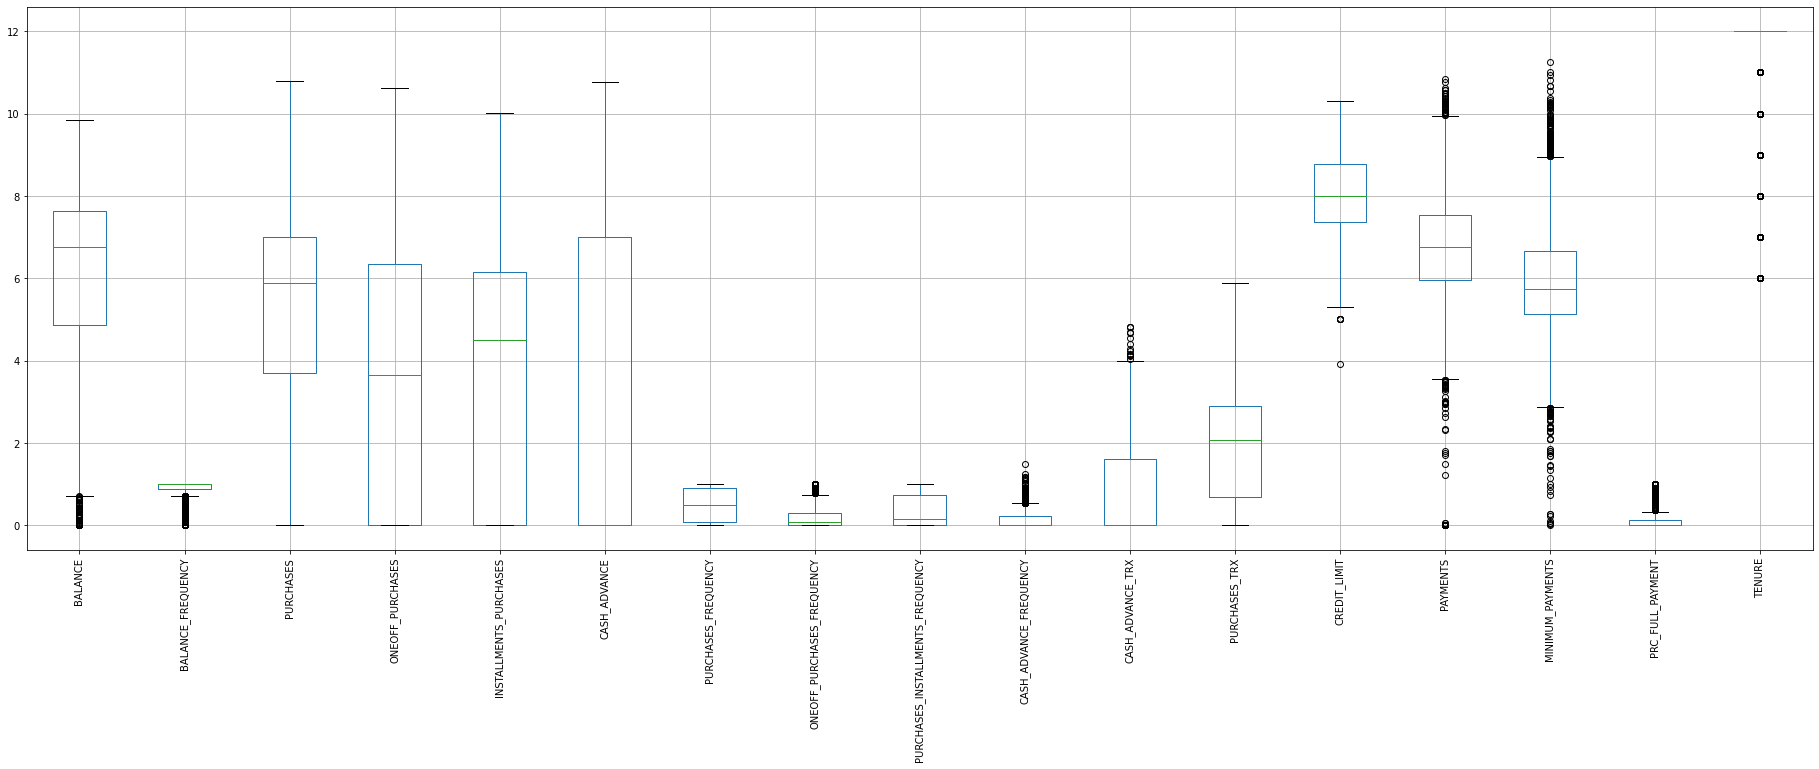

In [10]:
features.boxplot(rot=90, figsize=(32,10))

### Scale the features using scale function. This function will put all variables at the same scale, with mean zero and standard deviation equals to one.

In [11]:
cols = list(features.columns)
for col in cols:
    features[col] = scale(np.array(features[col]))
features.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.678661,-0.707313,-0.675349,-0.810069,-0.579510,-1.447163,-0.824484,-0.829841,-0.525551,0.36068
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.678661,-0.916995,0.573963,0.784603,-1.379210,0.926060,1.065033,0.908184,0.234227,0.36068
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.673451,-0.916995,-0.675349,-0.810069,0.487865,1.010229,-0.119300,0.450407,-0.525551,0.36068
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.399319,-0.916995,-0.258913,-0.123281,-0.874655,1.010229,-4.161996,-0.144271,-0.525551,0.36068
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.399319,-0.916995,-0.675349,-0.810069,-0.874655,-1.224909,-0.064979,-0.351833,-0.525551,0.36068


### Using the elbow method find the optimal number of clusters

In [12]:

X= np.array(features)
from sklearn.cluster import KMeans
wcss = []
for i in range(1,30):
    kmeans = KMeans(n_clusters = i, random_state =0)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Plot the graph to visualize the Elbow Method to find the optimal number of cluster 

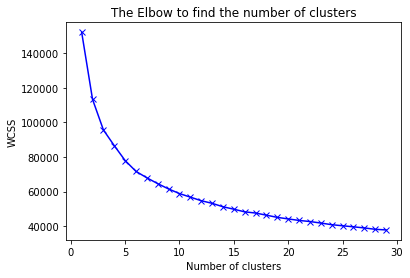

In [13]:
from matplotlib import pyplot as plt
plt.plot(range(1,30),wcss,'bx-')
plt.title('The Elbow to find the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Applying KMeans to the dataset with the optimal number of cluster and store the clusters in the dataframe.

In [14]:
#  from the elblow method we find the number of clusters as 6
kmeans = KMeans(n_clusters= 6 ,random_state = 0)

cluster_labels = kmeans.fit_predict(X)

clusters= pd.concat([features,pd.DataFrame({'CLUSTER':cluster_labels})],axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.678661,-0.707313,-0.675349,-0.810069,-0.579510,-1.447163,-0.824484,-0.829841,-0.525551,0.36068,4
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.678661,-0.916995,0.573963,0.784603,-1.379210,0.926060,1.065033,0.908184,0.234227,0.36068,2
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.673451,-0.916995,-0.675349,-0.810069,0.487865,1.010229,-0.119300,0.450407,-0.525551,0.36068,5
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.399319,-0.916995,-0.258913,-0.123281,-0.874655,1.010229,-4.161996,-0.144271,-0.525551,0.36068,0
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.399319,-0.916995,-0.675349,-0.810069,-0.874655,-1.224909,-0.064979,-0.351833,-0.525551,0.36068,0


### Interpretation of Clusters

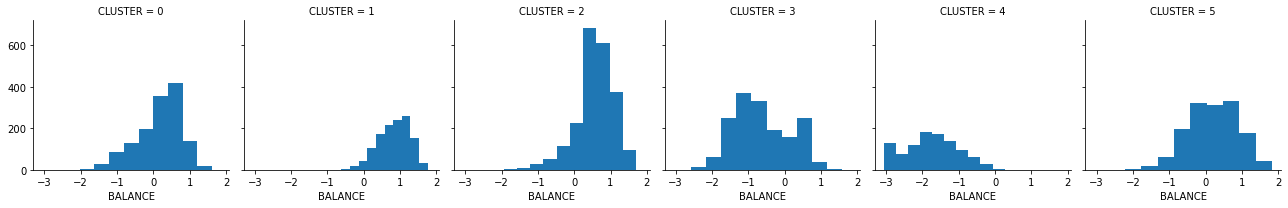

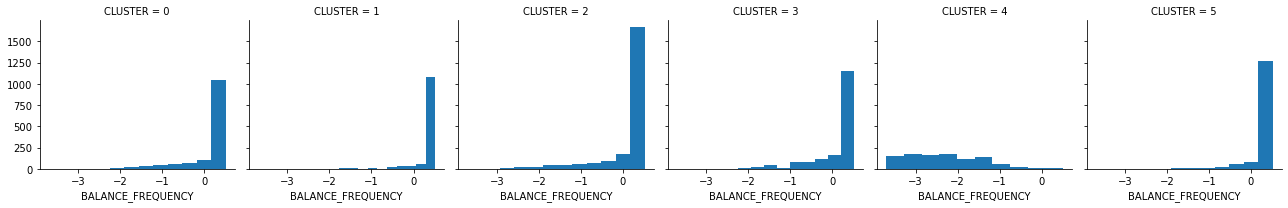

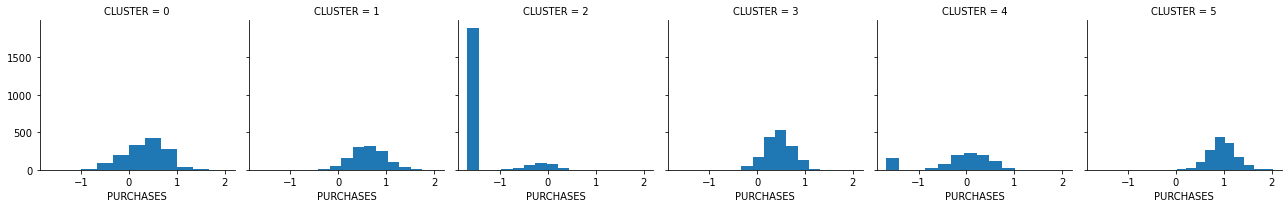

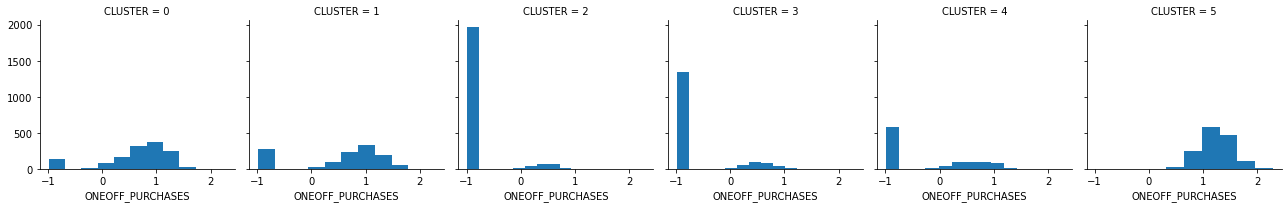

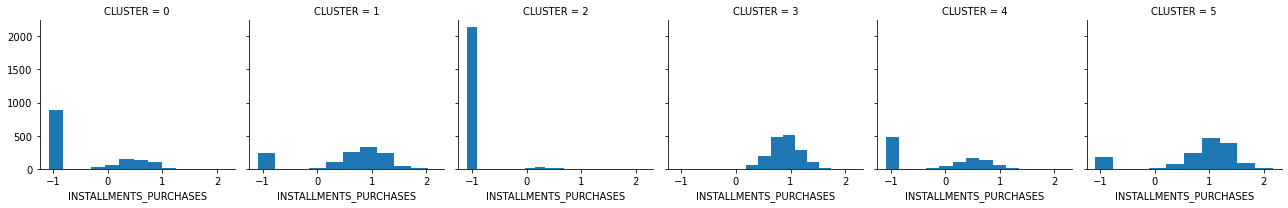

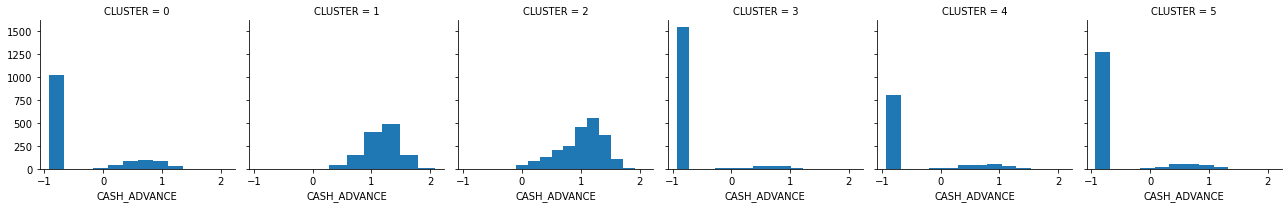

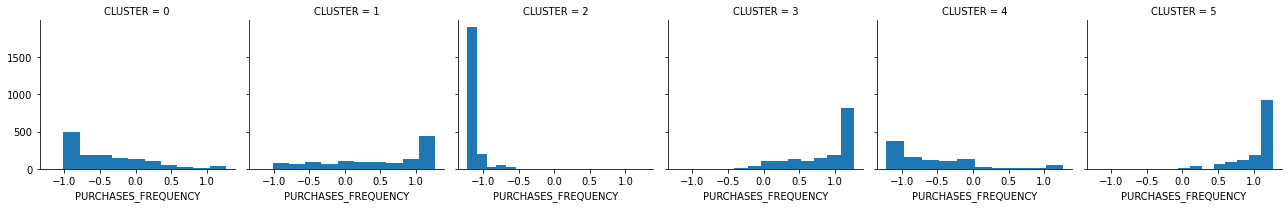

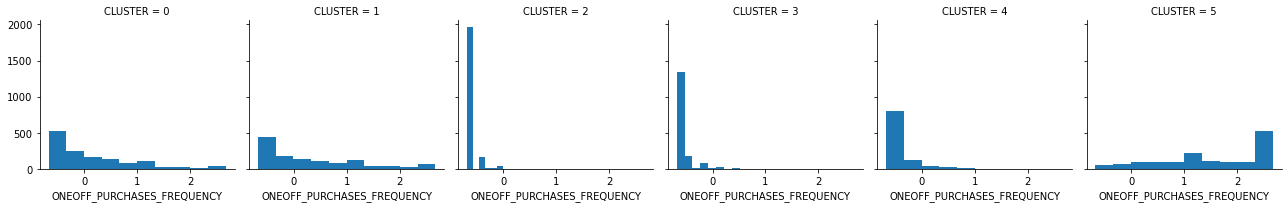

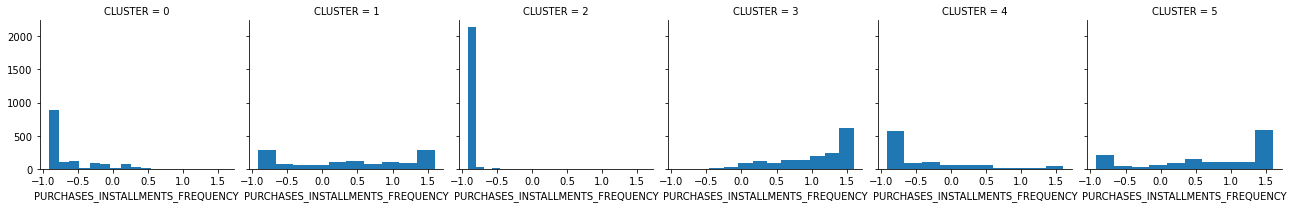

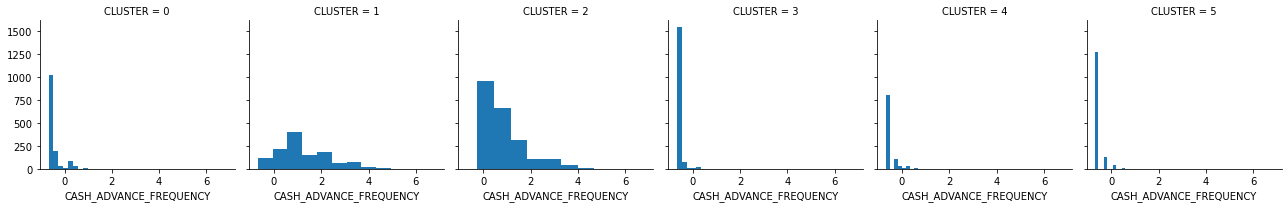

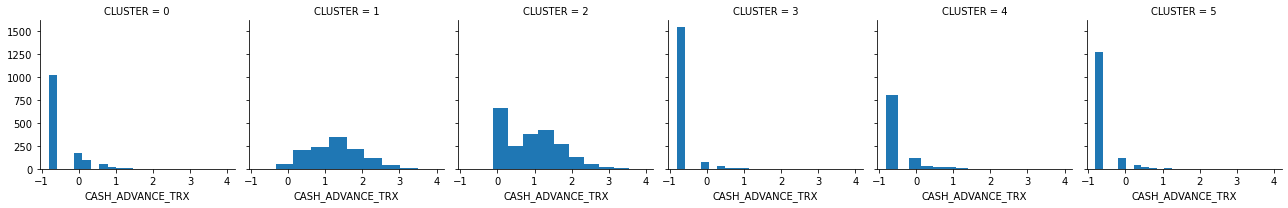

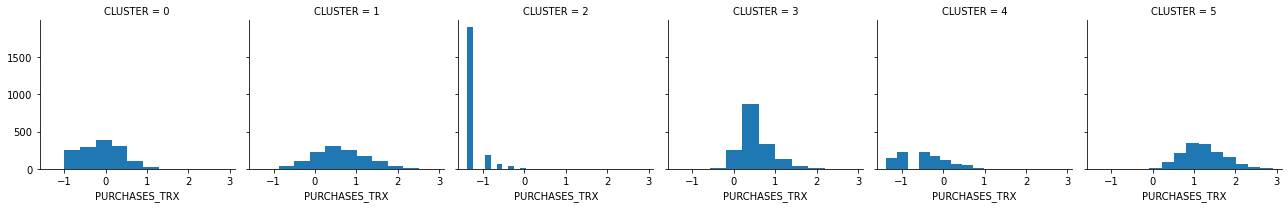

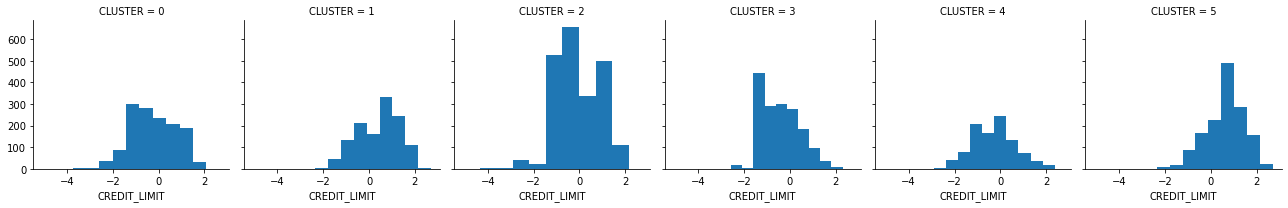

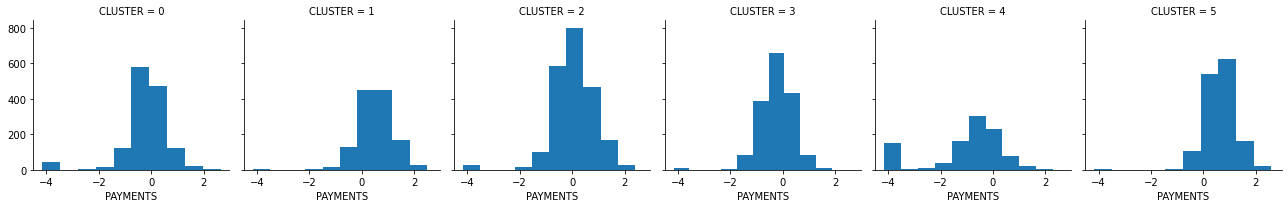

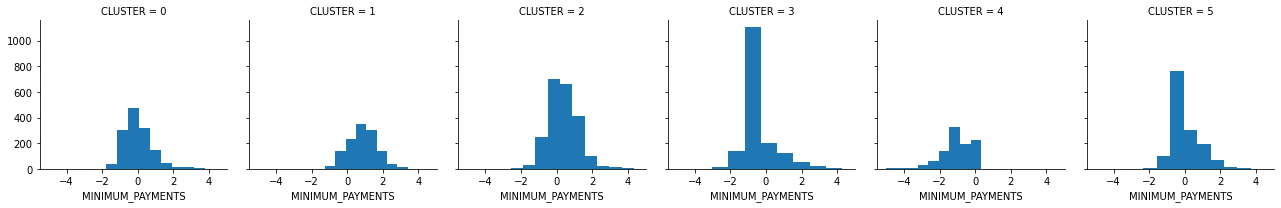

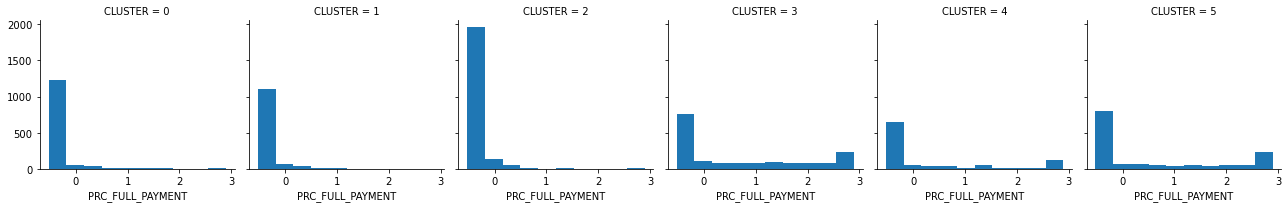

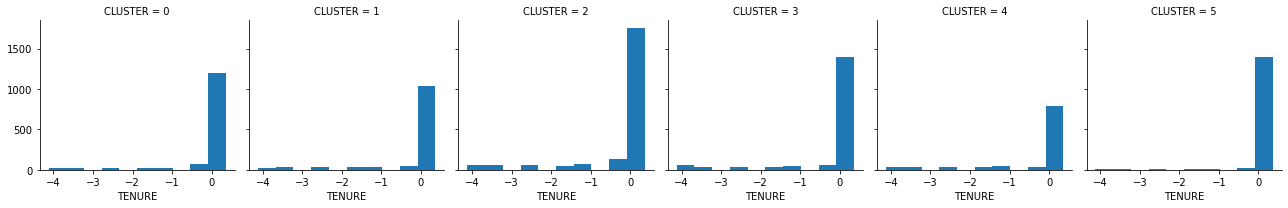

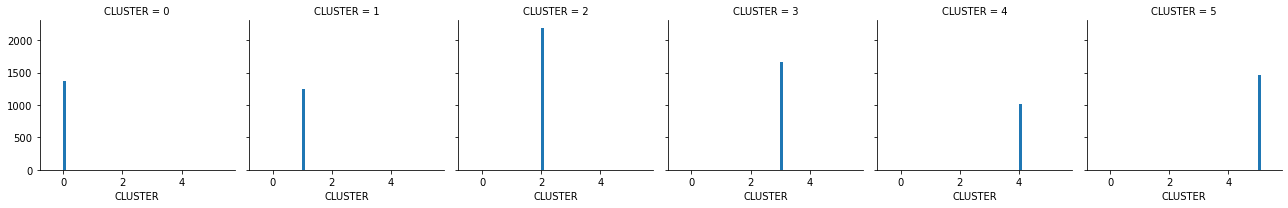

In [15]:
import seaborn as sns
for c in clusters:
    grid = sns.FacetGrid(clusters,col='CLUSTER')
    grid.map(plt.hist,c)

In [16]:
#Cluster 0: medium to low balance,high purchase frequency,buy on installments,medium to high credit limit
#Cluster 1: 


### Visualization of Clusters, use PCA to transform data to 2 dimensions for visualization

In [17]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
distance = 1 - cosine_similarity(X)
pca = PCA(2)
pca.fit(distance)
X_PCA = pca.transform(distance)
X_PCA.shape

(8950, 2)

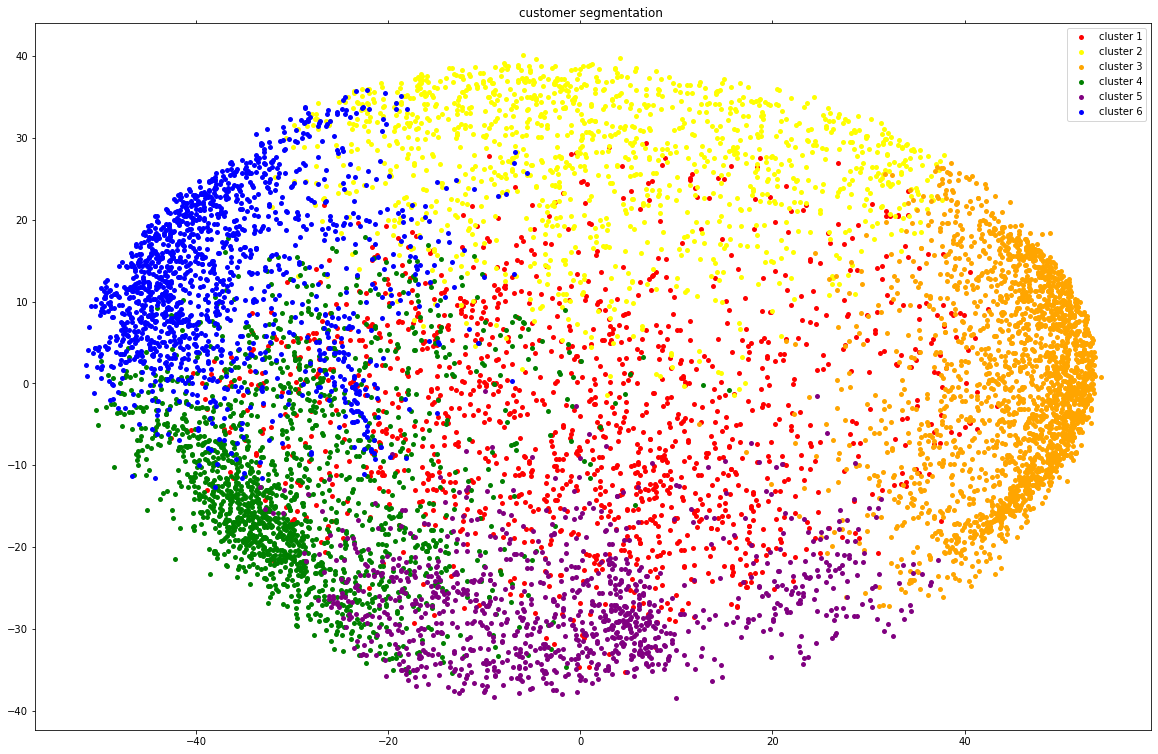

In [18]:
x,y = X_PCA[:,0] , X_PCA[:,1]
colours = {
    0:'red',
    1:'yellow',
    2:"orange",
    3:"green",
    4: "purple",
    5 : "blue"
}
names = {
    0:'cluster 1',
    1:'cluster 2',
    2:"cluster 3",
    3:"cluster 4",
    4:"cluster 5",
    5 :"cluster 6"}
df1  = pd.DataFrame({'x':x,'y':y,'label':cluster_labels})
groups = df1.groupby('label')
fig,ax = plt.subplots(figsize=(20,13))
for name,group in groups:
    ax.plot(group.x, group.y,marker ='o',linestyle ='',ms=5,color=colours[name],label=names[name],mec = 'none')
    ax.set_aspect('auto')
    ax.tick_params(axis ='x',which = 'both', bottom = 'off',top='off',labelbottom='off')
    ax.tick_params(axis ='y',which = 'both', bottom = 'off',top='off',labelbottom='off')
    
ax.legend()
ax.set_title('customer segmentation ')
plt.show()

# Change number of cluster just for checking number :10
##we can see how its all jumbled up

In [19]:
kmeans = KMeans(n_clusters= 10 ,random_state = 0)

cluster_labels = kmeans.fit_predict(X)

clusters= pd.concat([features,pd.DataFrame({'CLUSTER':cluster_labels})],axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.678661,-0.707313,-0.675349,-0.810069,-0.579510,-1.447163,-0.824484,-0.829841,-0.525551,0.36068,8
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.678661,-0.916995,0.573963,0.784603,-1.379210,0.926060,1.065033,0.908184,0.234227,0.36068,7
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.673451,-0.916995,-0.675349,-0.810069,0.487865,1.010229,-0.119300,0.450407,-0.525551,0.36068,6
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.399319,-0.916995,-0.258913,-0.123281,-0.874655,1.010229,-4.161996,-0.144271,-0.525551,0.36068,6
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.399319,-0.916995,-0.675349,-0.810069,-0.874655,-1.224909,-0.064979,-0.351833,-0.525551,0.36068,6


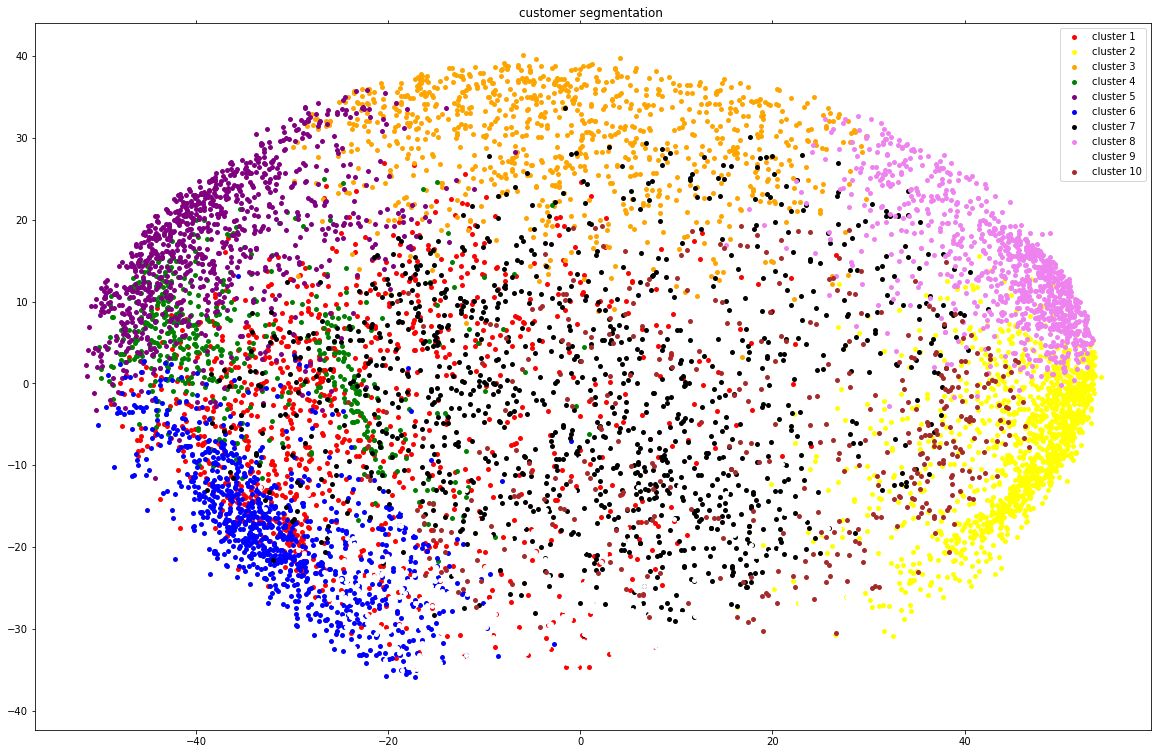

In [20]:
x,y = X_PCA[:,0] , X_PCA[:,1]

colours = {
    0:'red',
    1:'yellow',
    2:"orange",
    3:"green",
    4: "purple",
    5 : "blue",
    6:"black",
    7 : "violet",
    8 : "white",
    9 :  "brown"
}

names = {
    0:'cluster 1',
    1:'cluster 2',
    2:"cluster 3",
    3:"cluster 4",
    4:"cluster 5",
    5 :"cluster 6",
    6:"cluster 7",
    7:"cluster 8",
    8:"cluster 9",
  9:"cluster 10",
}

df1  = pd.DataFrame({'x':x,'y':y,'label':cluster_labels})
groups = df1.groupby('label')


fig,ax = plt.subplots(figsize=(20,13))

for name,group in groups:
    ax.plot(group.x, group.y,marker ='o',linestyle ='',ms=5,color=colours[name],label=names[name],mec = 'none')
    ax.set_aspect('auto')
    ax.tick_params(axis ='x',which = 'both', bottom = 'off',top='off',labelbottom='off')
    ax.tick_params(axis ='y',which = 'both', bottom = 'off',top='off',labelbottom='off')
    
ax.legend()
ax.set_title('customer segmentation ')
plt.show()